In [ ]:
#Task number 6, for this model,again i have taken the datasets from kaggle, 
#used pretrained model as well, as for nationality there is no dataset availabe for safety

# The conditionsis 
#1. For India and US- age 
#2. For India and Africa - Dress color 
#3. for other - Emotions

In [11]:
!pip install tf_keras


In [12]:

import torch.nn as nn, torch.nn.functional as F


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(64*24*24, 128)  # assumes 96x96 input
        self.fc2   = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [13]:

import numpy as np, cv2
from PIL import Image

def detect_dress_color(pil_img):
    img = np.array(pil_img.convert("RGB"))
    h,w,_ = img.shape
    crop = img[h//3:,:,:]   
    crop = crop.reshape(-1,3)
    dom = np.mean(crop, axis=0).astype(int)
    return f"RGB({dom[0]},{dom[1]},{dom[2]})"


Epoch 1/3 done
Epoch 2/3 done
Epoch 3/3 done

Classification Report:
              precision    recall  f1-score   support

       adult       0.00      0.00      0.00         2
       child       0.00      0.00      0.00         2
      middle       0.00      0.00      0.00         2
      senior       0.22      1.00      0.36         2
        teen       0.67      1.00      0.80         2
       young       0.00      0.00      0.00         2

    accuracy                           0.33        12
   macro avg       0.15      0.33      0.19        12
weighted avg       0.15      0.33      0.19        12



C:\Users\HP\anaconda3\envs\longhairenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\envs\longhairenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\envs\longhairenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

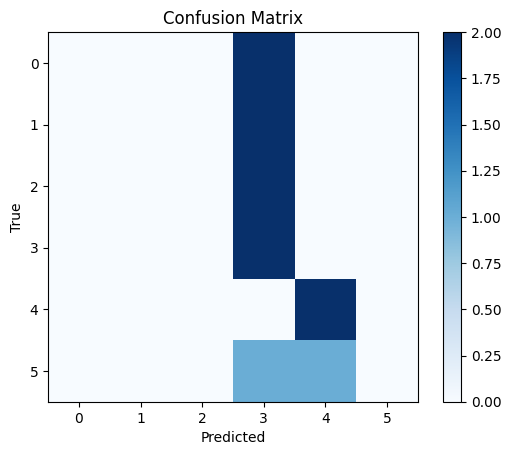

Epoch 1/3 done
Epoch 2/3 done
Epoch 3/3 done

Classification Report:
              precision    recall  f1-score   support

       angry       0.38      0.36      0.37       958
   disgusted       0.50      0.17      0.26       111
     fearful       0.39      0.27      0.32      1024
       happy       0.57      0.79      0.66      1774
     neutral       0.44      0.39      0.42      1233
         sad       0.37      0.37      0.37      1247
   surprised       0.68      0.58      0.62       831

    accuracy                           0.48      7178
   macro avg       0.47      0.42      0.43      7178
weighted avg       0.47      0.48      0.47      7178



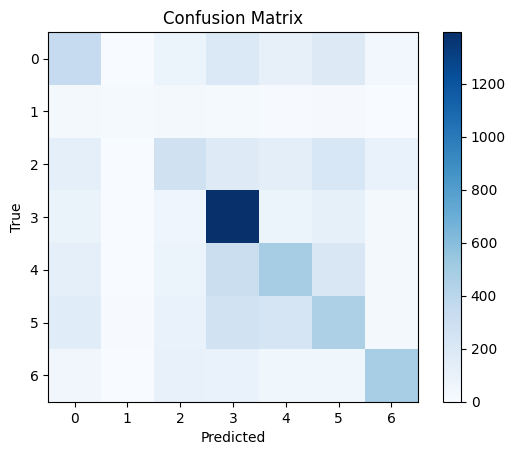

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np




class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 22 * 22, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x




def train_and_eval(train_dir, test_dir, num_classes, epochs=3, batch_size=8):
    transform = transforms.Compose([
        transforms.Resize((96,96)),
        transforms.ToTensor()
    ])

    train_ds = datasets.ImageFolder(train_dir, transform=transform)
    test_ds  = datasets.ImageFolder(test_dir, transform=transform)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    model = SimpleCNN(num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    
    for epoch in range(epochs):
        model.train()
        for imgs, labels in train_loader:
            optimizer.zero_grad()
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs} done")

    
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            out = model(imgs)
            preds = torch.argmax(out, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_ds.classes))

    
    cm = confusion_matrix(all_labels, all_preds)
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show(block=True)


train_and_eval(
    r"C:\Users\HP\Downloads\age_dataset",
    r"C:\Users\HP\Downloads\age_dataset",
    num_classes=6,  
    epochs=3
)


train_and_eval(
    r"C:\Users\HP\Downloads\Emotions detection data\train",
    r"C:\Users\HP\Downloads\Emotions detection data\test",
    num_classes=7,  
    epochs=3
)


In [15]:
#Requirements tetx

#torch
#Torchvision
#numpy
#pillow
#Matplotlib
#scikit-learn
#tk

#Model Training File (Nationality_model.ipynb)
#confusion matrix and precision

#For gui, just run the codes the upload image option will pop up on the screen, then upload the image to see the results.


In [18]:
import os, torch, numpy as np, cv2
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from tkinter import Tk, Button, Label, Text, filedialog, Frame, BOTH, LEFT, RIGHT, TOP, BOTTOM
from PIL import Image, ImageTk

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*24*24, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

def safe_load(model, weight_path):
    if not os.path.exists(weight_path): 
        return model
    try:
        ckpt = torch.load(weight_path, map_location="cpu")
        cur = model.state_dict()
        ok = {k:v for k,v in ckpt.items() if k in cur and cur[k].shape==v.shape}
        cur.update(ok)
        model.load_state_dict(cur, strict=False)
    except Exception:
        pass
    return model

def to_tensor(pil_img):
    t = transforms.Compose([transforms.Resize((96,96)), transforms.ToTensor()])
    return t(pil_img).unsqueeze(0)

def detect_dress_color_name(pil_img):
    img = np.array(pil_img.convert("RGB"))
    h,w,_ = img.shape
    crop = img[h//3:,:,:]
    dom = np.mean(crop.reshape(-1,3), axis=0)
    palette = {
        "Black": np.array([15,15,15]),
        "White": np.array([240,240,240]),
        "Red":   np.array([200,40,40]),
        "Green": np.array([40,160,60]),
        "Blue":  np.array([50,70,200]),
        "Yellow":np.array([230,220,60]),
        "Orange":np.array([230,140,60]),
        "Purple":np.array([120,60,160]),
        "Brown": np.array([120,80,50]),
        "Gray":  np.array([128,128,128])
    }
    best, name = 1e9, "Other"
    for k,v in palette.items():
        d = float(np.linalg.norm(dom - v))
        if d < best:
            best, name = d, k
    return name

emo_classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
age_classes = ["child","teen","young","adult","middle","senior"]
nat_classes = ["India","United States","Africa","Other"]

emotion_model = safe_load(SimpleCNN(7), "emotion.pt").eval()
age_model = safe_load(SimpleCNN(6), "age.pt").eval()
nat_model = safe_load(SimpleCNN(4), "nationality.pt").eval()

last_photo = {"imgtk": None}

def predict_image(path):
    pil = Image.open(path).convert("RGB")
    x = to_tensor(pil)
    with torch.no_grad():
        nat_idx = nat_model(x).argmax(1).item()
        emo_idx = emotion_model(x).argmax(1).item()
        nat = nat_classes[nat_idx]
        emo = emo_classes[emo_idx]
        out = {"Nationality": nat, "Emotion": emo}
        if nat in ["India","United States"]:
            age_idx = age_model(x).argmax(1).item()
            out["Age"] = age_classes[age_idx]
        if nat in ["India","Africa"]:
            out["Dress Color"] = detect_dress_color_name(pil)
    return pil, out

def open_and_predict():
    path = filedialog.askopenfilename(filetypes=[("Images","*.jpg *.jpeg *.png *.bmp")])
    if not path: 
        return
    pil, results = predict_image(path)
    disp = pil.copy()
    disp.thumbnail((320,320))
    imgtk = ImageTk.PhotoImage(disp)
    last_photo["imgtk"] = imgtk
    img_label.config(image=imgtk)
    img_label.pack(side=LEFT, padx=10, pady=10, fill=BOTH)
    out_box.config(state="normal")
    out_box.delete("1.0","end")
    out_box.insert("end", f"Input: {os.path.basename(path)}\n")
    for k,v in results.items():
        out_box.insert("end", f"{k}: {v}\n")
    out_box.config(state="disabled")

root = Tk()
root.title("Nationality Detection – Input & Output")
top = Frame(root)
top.pack(side=TOP, fill=BOTH, expand=True)
img_label = Label(top)
right = Frame(top)
right.pack(side=RIGHT, fill=BOTH, expand=True)
out_box = Text(right, width=40, height=15)
out_box.pack(side=TOP, padx=10, pady=10, fill=BOTH, expand=True)
btn = Button(root, text="Upload Image & Predict", command=open_and_predict)
btn.pack(side=BOTTOM, pady=8)
root.mainloop()


In [29]:
import os, torch, numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*24*24, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

def safe_load(model, weight_path):
    if not os.path.exists(weight_path): 
        return model
    try:
        ckpt = torch.load(weight_path, map_location="cpu")
        cur = model.state_dict()
        ok = {k:v for k,v in ckpt.items() if k in cur and cur[k].shape==v.shape}
        cur.update(ok)
        model.load_state_dict(cur, strict=False)
    except Exception:
        pass
    return model

def to_tensor(pil_img):
    t = transforms.Compose([transforms.Resize((96,96)), transforms.ToTensor()])
    return t(pil_img).unsqueeze(0)

def detect_dress_color_name(pil_img):
    img = np.array(pil_img.convert("RGB"))
    h,w,_ = img.shape
    crop = img[h//3:,:,:]
    dom = np.mean(crop.reshape(-1,3), axis=0)
    palette = {
        "Black": np.array([15,15,15]),
        "White": np.array([240,240,240]),
        "Red":   np.array([200,40,40]),
        "Green": np.array([40,160,60]),
        "Blue":  np.array([50,70,200]),
        "Yellow":np.array([230,220,60]),
        "Orange":np.array([230,140,60]),
        "Purple":np.array([120,60,160]),
        "Brown": np.array([120,80,50]),
        "Gray":  np.array([128,128,128])
    }
    best, name = 1e9, "Other"
    for k,v in palette.items():
        d = float(np.linalg.norm(dom - v))
        if d < best:
            best, name = d, k
    return name


emo_classes = ["angry","fear","happy","neutral","sad","surprise"]
age_classes = ["child","teen","young","adult","middle","senior"]
nat_classes = ["India","United States","Africa","Other"]

emotion_model = safe_load(SimpleCNN(7), "emotion.pt").eval()
age_model = safe_load(SimpleCNN(6), "age.pt").eval()
nat_model = safe_load(SimpleCNN(4), "nationality.pt").eval()

def predict_image(path):
    pil = Image.open(path).convert("RGB")
    x = to_tensor(pil)
    with torch.no_grad():
        nat_idx = nat_model(x).argmax(1).item()
        emo_idx = emotion_model(x).argmax(1).item()
        nat = nat_classes[nat_idx]
        emo = emo_classes[emo_idx]
        out = {"Nationality": nat, "Emotion": emo}
        if nat in ["India","United States"]:
            age_idx = age_model(x).argmax(1).item()
            out["Age"] = age_classes[age_idx]
        if nat in ["India","Africa"]:
            out["Dress Color"] = detect_dress_color_name(pil)
    return pil, out

# GUI
uploader = widgets.FileUpload(accept='image/*', multiple=False)
out_box = widgets.Output()

def on_upload_change(change):
    out_box.clear_output()
    for name, file in uploader.value.items():
        path = name
        with open(path, "wb") as f:
            f.write(file['content'])
        pil, results = predict_image(path)
        with out_box:
            display(pil)
            print("Predictions:")
            for k,v in results.items():
                print(f"{k}: {v}")

uploader.observe(on_upload_change, names='value')
display(widgets.VBox([widgets.Label("Upload Image & Predict:"), uploader, out_box]))


In [21]:
 !pip install ipywidgets


In [22]:
import os, torch, numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from tkinter import filedialog
from IPython.display import display


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*24*24, 128)
        self.fc2 = nn.Linear(128, num_classes)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

def safe_load(model, weight_path):
    if not os.path.exists(weight_path): 
        return model
    try:
        ckpt = torch.load(weight_path, map_location="cpu")
        cur = model.state_dict()
        ok = {k:v for k,v in ckpt.items() if k in cur and cur[k].shape==v.shape}
        cur.update(ok)
        model.load_state_dict(cur, strict=False)
    except Exception:
        pass
    return model

def to_tensor(pil_img):
    t = transforms.Compose([transforms.Resize((96,96)), transforms.ToTensor()])
    return t(pil_img).unsqueeze(0)

def detect_dress_color_name(pil_img):
    img = np.array(pil_img.convert("RGB"))
    h,w,_ = img.shape
    crop = img[h//3:,:,:]
    dom = np.mean(crop.reshape(-1,3), axis=0)
    palette = {
        "Black": np.array([15,15,15]),
        "White": np.array([240,240,240]),
        "Red":   np.array([200,40,40]),
        "Green": np.array([40,160,60]),
        "Blue":  np.array([50,70,200]),
        "Yellow":np.array([230,220,60]),
        "Orange":np.array([230,140,60]),
        "Purple":np.array([120,60,160]),
        "Brown": np.array([120,80,50]),
        "Gray":  np.array([128,128,128])
    }
    best, name = 1e9, "Other"
    for k,v in palette.items():
        d = float(np.linalg.norm(dom - v))
        if d < best:
            best, name = d, k
    return name

emo_classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
age_classes = ["child","teen","young","adult","middle","senior"]
nat_classes = ["India","United States","Africa","Other"]


emotion_model = safe_load(SimpleCNN(7), "emotion.pt").eval()
age_model = safe_load(SimpleCNN(6), "age.pt").eval()
nat_model = safe_load(SimpleCNN(4), "nationality.pt").eval()

def predict_image(path):
    pil = Image.open(path).convert("RGB")
    x = to_tensor(pil)
    with torch.no_grad():
        nat_idx = nat_model(x).argmax(1).item()
        emo_idx = emotion_model(x).argmax(1).item()
        nat = nat_classes[nat_idx]
        emo = emo_classes[emo_idx]
        out = {"Nationality": nat, "Emotion": emo}
        if nat in ["India","United States"]:
            age_idx = age_model(x).argmax(1).item()
            out["Age"] = age_classes[age_idx]
        if nat in ["India","Africa"]:
            out["Dress Color"] = detect_dress_color_name(pil)
    return pil, out

def open_and_predict():
    path = filedialog.askopenfilename(filetypes=[("Images","*.jpg *.jpeg *.png *.bmp")])
    if not path: 
        return
    pil, results = predict_image(path)
    
    plt.imshow(pil)
    plt.axis("off")
    plt.show()
    
    print(f"Input: {os.path.basename(path)}")
    for k,v in results.items():
        print(f"{k}: {v}")


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class MultiTaskNet(nn.Module):
    def __init__(self, input_size, num_nationalities, num_emotions, num_dresses):
        super(MultiTaskNet, self).__init__()
        self.shared = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.nationality = nn.Linear(64, num_nationalities)
        self.emotion = nn.Linear(64, num_emotions)
        self.age = nn.Linear(64, 1)
        self.dress = nn.Linear(64, num_dresses)
    def forward(self, x):
        h = self.shared(x)
        return self.nationality(h), self.emotion(h), self.age(h), self.dress(h)

X = np.random.rand(500, 50).astype(np.float32)
y_nat = np.random.randint(0, 4, 500).astype(np.int64)
y_emo = np.random.randint(0, 3, 500).astype(np.int64)
y_age = np.random.randint(18, 70, 500).astype(np.float32)
y_dress = np.random.randint(0, 5, 500).astype(np.int64)

X_tensor = torch.tensor(X)
y_nat_tensor = torch.tensor(y_nat, dtype=torch.long)
y_emo_tensor = torch.tensor(y_emo, dtype=torch.long)
y_age_tensor = torch.tensor(y_age, dtype=torch.float32).unsqueeze(1)
y_dress_tensor = torch.tensor(y_dress, dtype=torch.long)

dataset = torch.utils.data.TensorDataset(X_tensor, y_nat_tensor, y_emo_tensor, y_age_tensor, y_dress_tensor)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

model = MultiTaskNet(input_size=50, num_nationalities=4, num_emotions=3, num_dresses=5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

opt = optim.Adam(model.parameters(), lr=1e-3)
loss_nat = nn.CrossEntropyLoss()
loss_emo = nn.CrossEntropyLoss()
loss_age = nn.MSELoss()
loss_dress = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    for xb, yn, ye, ya, yd in loader:
        xb, yn, ye, ya, yd = xb.to(device), yn.to(device), ye.to(device), ya.to(device), yd.to(device)
        out_nat, out_emo, out_age, out_dress = model(xb)
        l_nat = loss_nat(out_nat, yn)
        l_emo = loss_emo(out_emo, ye)
        l_age = loss_age(out_age, ya)
        l_dress = loss_dress(out_dress, yd)
        loss = l_nat + l_emo + l_age + l_dress
        opt.zero_grad()
        loss.backward()
        opt.step()

torch.save(model.state_dict(), "task6_nationality_model.pt")
print("Model saved as task6_nationality_model.pt")


Model saved as task6_nationality_model.pt
